### 0. 데이터 전처리 및 정리

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

from matplotlib import font_manager
f_path = "C:/windows/Fonts/malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
rc('font', family='Malgun Gothic')

'Malgun Gothic'

In [220]:
win_team = pd.read_csv('C:\\data\\ranked_win_team_game_edit.csv')
lose_team = pd.read_csv('C:\\data\\ranked_lose_team_game_edit.csv')

win_player = pd.read_csv('C:\\data\\win_player_ranked_sum.csv')
lose_player = pd.read_csv('C:\\data\\lose_player_ranked_sum.csv')

# 게임아이디, 게임소요시간을 키로 inner join 팀데이터, 플레이어 데이터
merged_df1 = pd.merge(win_team, win_player, on=['gameId','gameDuration'], how='inner')
merded_df2 = pd.merge(lose_team, lose_player, on = ['gameId','gameDuration'], how='inner')

# 승리팀, 패배팀 데이터 결합
df = pd.concat([merged_df1,merded_df2], ignore_index=True)

# 필요없는 컬럼 제거
df = df.drop(['queueId', 'P1_teamId','gameVersion'], axis = 'columns')

# True, False 로 되어있는 데이터, bool 타입으로 일괄 변경
n = df.shape[1]
for i in range(n):
    if str(df.iloc[0,i]) =='True' or str(df.iloc[0,i]) == 'False':
        df[df.columns[i]] = df[df.columns[i]].astype(bool)

# 범주형 데이터를 이진형 데이터로 변환
df = df.replace({True : 1, False : 0})
df = df.replace({'Win': 1, 'Fail': 0})
df = df.replace({100 : 1, 200 : 0})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154172 entries, 0 to 154171
Data columns (total 40 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   gameId                                      154172 non-null  float64
 1   gameDuration                                154172 non-null  float64
 2   teamId                                      154172 non-null  int64  
 3   win                                         154172 non-null  int64  
 4   firstBlood                                  154172 non-null  int64  
 5   firstTower                                  154172 non-null  int64  
 6   firstInhibitor                              154172 non-null  int64  
 7   firstBaron                                  154172 non-null  int64  
 8   firstDragon                                 154172 non-null  int64  
 9   firstRiftHerald                             154172 non-null  int64  
 

In [221]:
df.head()

,gameId,gameDuration,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,...,P_stats_physicalDamageTaken_sum,P_stats_trueDamageTaken_sum,P_stats_totalDamageTaken_sum,P_stats_totalHeal_sum,P_stats_damageSelfMitigated_sum,P_stats_timeCCingOthers_sum,P_stats_wardsPlaced_sum,P_stats_wardsKilled_sum,P_stats_goldEarned_sum,P_stats_goldSpent_sum
0,4247263043.00000,1323.00000,0,1,0,1,1,0,1,1,...,53345.00000,2481.00000,83723.00000,38711.00000,43665.00000,93.00000,50.00000,17.00000,49832.00000,41935.00000
1,4247155821.00000,1317.00000,1,1,0,0,0,0,1,1,...,49033.00000,1358.00000,63456.00000,26397.00000,42434.00000,74.00000,57.00000,18.00000,41072.00000,34960.00000
2,4243963257.00000,932.00000,0,1,1,1,1,0,1,1,...,27051.00000,638.00000,40416.00000,12589.00000,28055.00000,67.00000,40.00000,9.00000,35364.00000,30755.00000
3,4241678498.00000,2098.00000,0,1,1,1,0,0,0,1,...,80742.00000,10851.00000,144672.00000,65312.00000,129493.00000,163.00000,96.00000,56.00000,70528.00000,63893.00000
4,4241538868.00000,2344.00000,1,1,1,1,1,1,1,1,...,64462.00000,14975.00000,162481.00000,37161.00000,117374.00000,119.00000,114.00000,35.00000,74955.00000,71580.00000


In [222]:
#데이터 null 확인
df.isnull().sum().sum()

0

In [223]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['gameId', 'gameDuration', 'teamId', 'win', 'firstBlood', 'firstTower',
       'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald',
       'towerKills', 'inhibitorKills', 'baronKills', 'dragonKills',
       'vilemawKills', 'riftHeraldKills', 'dominionVictoryScore',
       'ban_champion_1', 'ban_champion_2', 'ban_champion_3', 'ban_champion_4',
       'ban_champion_5', 'P_stats_kills_sum', 'P_stats_deaths_sum',
       'P_stats_assists_sum', 'P_stats_magicDamageDealtToChampions_sum',
       'P_stats_physicalDamageDealtToChampions_sum',
       'P_stats_trueDamageDealtToChampions_sum',
       'P_stats_totalDamageDealtToChampions_sum',
       'P_stats_magicalDamageTaken_sum', 'P_stats_physicalDamageTaken_sum',
       'P_stats_trueDamageTaken_sum', 'P_stats_totalDamageTaken_sum',
       'P_stats_totalHeal_sum', 'P_stats_damageSelfMitigated_sum',
       'P_stats_timeCCingOthers_sum', 'P_stats_wardsPlaced_sum',
       'P_stats_wardsKilled

### 1. 승리팀 평균치, 패배팀 평균치 비교

In [224]:
df.describe()[['towerKills','inhibitorKills','baronKills','dragonKills']]

,towerKills,inhibitorKills,baronKills,dragonKills
count,154172.00000,154172.00000,154172.00000,154172.00000
mean,4.49355,0.59934,0.35552,1.59901
std,3.43048,0.86979,0.57055,1.25160
min,0.00000,0.00000,0.00000,0.00000
25%,1.00000,0.00000,0.00000,1.00000
50%,4.00000,0.00000,0.00000,2.00000
75%,7.00000,1.00000,1.00000,2.00000
max,11.00000,10.00000,5.00000,7.00000


In [225]:
# 패배팀 데이터 통계
df[df['win'] == 0].describe()[['towerKills','inhibitorKills','baronKills','dragonKills']]

,towerKills,inhibitorKills,baronKills,dragonKills
count,77086.00000,77086.00000,77086.00000,77086.00000
mean,1.87915,0.07934,0.12356,0.93704
std,1.96351,0.36827,0.37490,1.02587
min,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000,0.00000
50%,1.00000,0.00000,0.00000,1.00000
75%,3.00000,0.00000,0.00000,2.00000
max,11.00000,6.00000,4.00000,6.00000


In [226]:
# 승리팀 데이터 통계
df[df['win'] == 1].describe()[['towerKills','inhibitorKills','baronKills','dragonKills']]

,towerKills,inhibitorKills,baronKills,dragonKills
count,77086.00000,77086.00000,77086.00000,77086.00000
mean,7.10794,1.11935,0.58749,2.26097
std,2.45169,0.91468,0.63474,1.09736
min,0.00000,0.00000,0.00000,0.00000
25%,5.00000,1.00000,0.00000,1.00000
50%,7.00000,1.00000,1.00000,2.00000
75%,9.00000,2.00000,1.00000,3.00000
max,11.00000,10.00000,5.00000,7.00000


In [227]:
df[df['towerKills'] == 0].describe()[['inhibitorKills','baronKills','dragonKills']]

,inhibitorKills,baronKills,dragonKills
count,24715.00000,24715.00000,24715.00000
mean,0.00000,0.01088,0.38264
std,0.00000,0.10531,0.61674
min,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000
50%,0.00000,0.00000,0.00000
75%,0.00000,0.00000,1.00000
max,0.00000,2.00000,4.00000


In [228]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

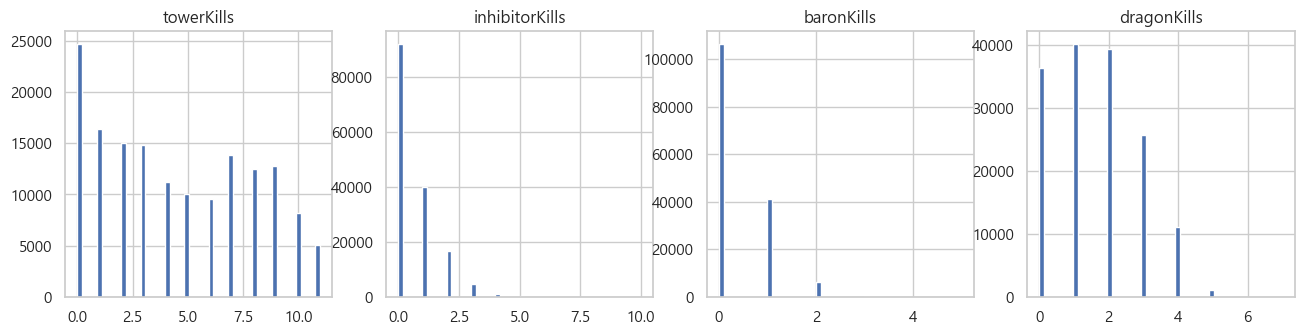

In [229]:
df_hist = df[['towerKills','inhibitorKills','baronKills','dragonKills']]

def plot_hist_each_column(df_hist):
    plt.rcParams['figure.figsize'] = [20,20]
    fig = plt.figure()
    for i in range(len(df_hist.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df_hist[df_hist.columns[i]], bins=50)
        ax.set_title(df_hist.columns[i])
    plt.show()

plot_hist_each_column(df_hist)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154172 entries, 0 to 154171
Data columns (total 40 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   gameId                                      154172 non-null  float64
 1   gameDuration                                154172 non-null  float64
 2   teamId                                      154172 non-null  int64  
 3   win                                         154172 non-null  int64  
 4   firstBlood                                  154172 non-null  int64  
 5   firstTower                                  154172 non-null  int64  
 6   firstInhibitor                              154172 non-null  int64  
 7   firstBaron                                  154172 non-null  int64  
 8   firstDragon                                 154172 non-null  int64  
 9   firstRiftHerald                             154172 non-null  int64  
 

### 2. 승리팀 중요 변수 확인

In [231]:
# 숫자형 데이터 제거, 퍼스트 데이터만 요인 분석

df_first = df[["win", "teamId", "firstBlood", "firstTower", "firstInhibitor", "firstBaron", "firstDragon", "firstRiftHerald"]]

#df_first2 = df.drop(["win", "teamId", "firstBlood", "firstTower", "firstInhibitor", "firstBaron", "firstDragon", "firstRiftHerald",
#            "dominionVictoryScore","gameId", "ban_champion_1", "ban_champion_2", 
#            "ban_champion_3", "ban_champion_4", "ban_champion_5",'vilemawKills'], axis=1)

df_first.head()

,win,teamId,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald
0,1,0,0,1,1,0,1,1
1,1,1,0,0,0,0,1,1
2,1,0,1,1,1,0,1,1
3,1,0,1,1,0,0,0,1
4,1,1,1,1,1,1,1,1


<Figure size 1000x1000 with 0 Axes>

<AxesSubplot: >

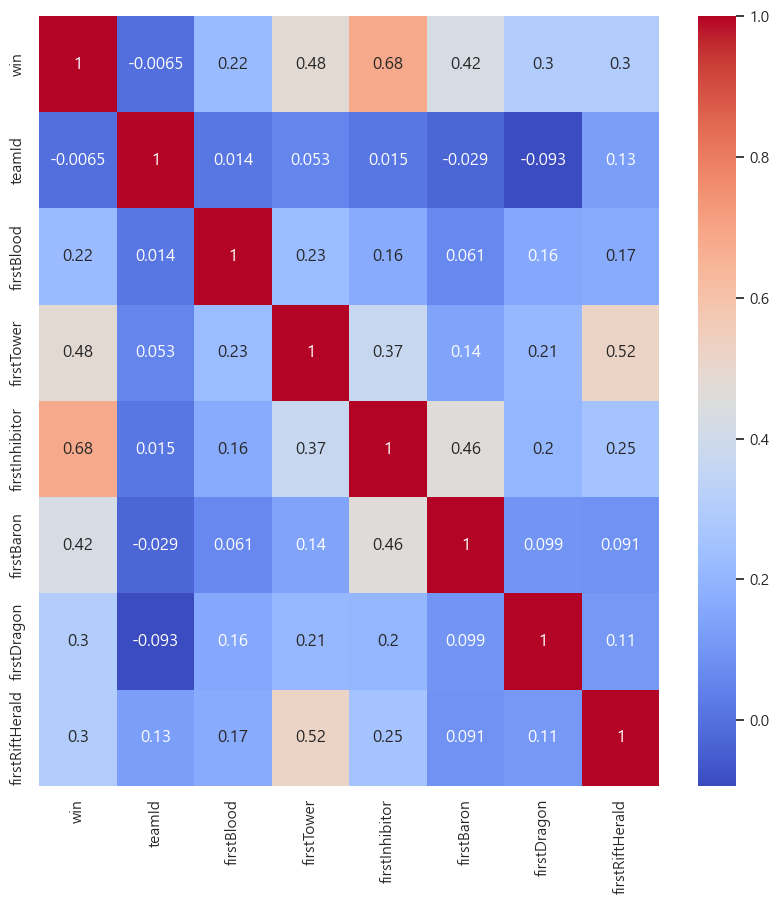

In [232]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#항목별 상관도 확인
plt.figure(figsize=(10,10))
sns.heatmap(df_first.corr(),cmap='coolwarm',annot=True)
plt.show()

In [233]:
df_first["firstBlood"] = df["firstBlood"].astype(int)
df_first["firstTower"] = df["firstTower"].astype(int)
df_first["firstInhibitor"] = df["firstInhibitor"].astype(int)
df_first["firstDragon"] = df["firstDragon"].astype(int)
df_first["firstBaron"] = df["firstBaron"].astype(int)
df_first["firstRiftHerald"] = df["firstRiftHerald"].astype(int)

In [234]:
df_first.groupby('win').mean()

,teamId,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald
win,,,,,,,
0,0.50323,0.39001,0.25905,0.04569,0.09121,0.34468,0.33260
1,0.49677,0.60999,0.74035,0.70760,0.47243,0.64174,0.63091


DecisionTreeClassifier(min_samples_split=40000, random_state=0)

<Figure size 5000x1000 with 0 Axes>

[Text(0.6, 0.9, 'firstInhibitor <= 0.5\ngini = 0.5\nsamples = 154172\nvalue = [77086, 77086]\nclass = fail'),
 Text(0.4, 0.7, 'firstTower <= 0.5\ngini = 0.359\nsamples = 96104\nvalue = [73564, 22540]\nclass = fail'),
 Text(0.3, 0.5, 'firstBaron <= 0.5\ngini = 0.179\nsamples = 61932\nvalue = [55761, 6171]\nclass = fail'),
 Text(0.2, 0.3, 'firstDragon <= 0.5\ngini = 0.112\nsamples = 55826\nvalue = [52500, 3326]\nclass = fail'),
 Text(0.1, 0.1, 'gini = 0.067\nsamples = 37562\nvalue = [36264, 1298]\nclass = fail'),
 Text(0.3, 0.1, 'gini = 0.197\nsamples = 18264\nvalue = [16236, 2028]\nclass = fail'),
 Text(0.4, 0.3, 'gini = 0.498\nsamples = 6106\nvalue = [3261, 2845]\nclass = fail'),
 Text(0.5, 0.5, 'gini = 0.499\nsamples = 34172\nvalue = [17803, 16369]\nclass = fail'),
 Text(0.8, 0.7, 'firstDragon <= 0.5\ngini = 0.114\nsamples = 58068\nvalue = [3522, 54546]\nclass = win'),
 Text(0.7, 0.5, 'gini = 0.157\nsamples = 21838\nvalue = [1871, 19967]\nclass = win'),
 Text(0.9, 0.5, 'gini = 0.087\n

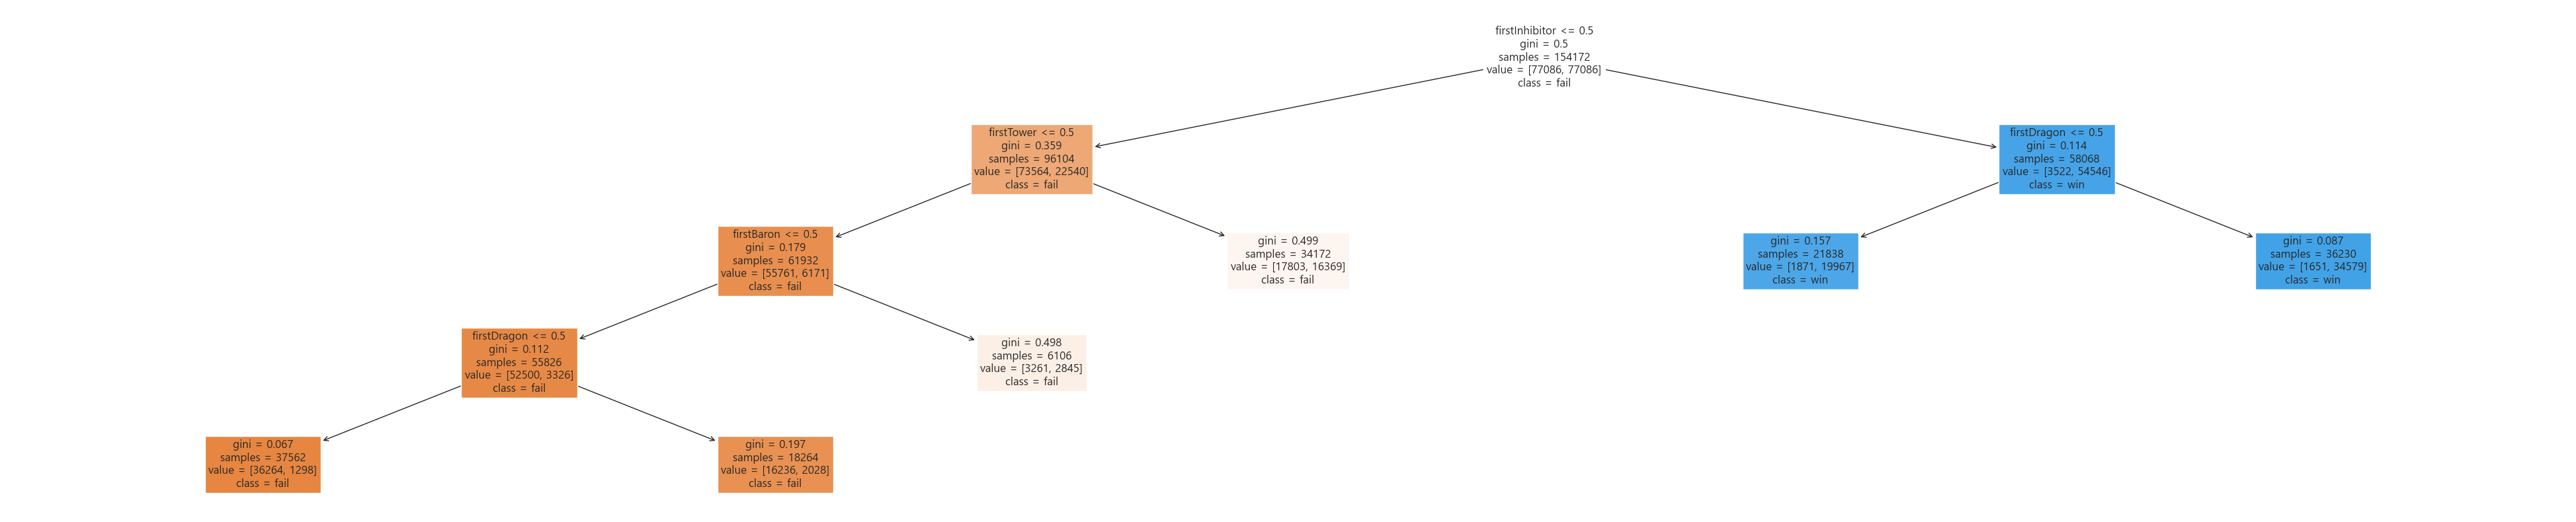

In [235]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
X = df_first.drop(['win'], axis=1)
y = df_first['win']
xname = X.columns
yname = ['fail','win']

c_tree = DecisionTreeClassifier(min_samples_split=40000,random_state=0) 
c_tree.fit(X, y)
plt.figure(figsize=(50,10))
plot_tree(c_tree, feature_names=xname, class_names=yname, filled=True, fontsize=12) 
plt.show()


### 3. 경기 시간 segment 별 EDA

### 4. 앙상블 분석 : 승리 예측 정확도 비교

     4.1 랜덤포레스트

In [236]:
from sklearn.model_selection import train_test_split

#X = df[['firstBlood', 'firstTower',
#       'firstBaron', 'firstDragon', 'firstInhibitor', 'dragonKills',
#       'baronKills', 'towerKills', 'inhibitorKills']]

X = df.drop(['gameDuration','gameId', 'win',
       'vilemawKills', 'dominionVictoryScore', 'ban_champion_1', 'ban_champion_2',
       'ban_champion_3', 'ban_champion_4', 'ban_champion_5'], axis=1)

y = df['win']


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, stratify=y, 
                                                    random_state=123456)

In [237]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

#oob_score = out of bag score로써 예측이 얼마나 정확한가에 대한 추정치입니다.
print(f'랜덤포레스트 테스트 정확도=  : {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')


RandomForestClassifier(oob_score=True, random_state=123456)

랜덤포레스트 테스트 정확도=  : 0.981
Mean accuracy score: 0.982


    4.2 GradientBoosting

In [238]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gbc = GradientBoostingClassifier()
clf_gbc.fit(X_train,y_train)

y_pred = clf_gbc.predict(X_test)

print('GradientBoosting 테스트 정확도 = ' + str(accuracy_score(y_test,y_pred)))

GradientBoostingClassifier()

GradientBoosting 테스트 정확도 = 0.9819163012739018


    4.3 Xgboost

In [239]:
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot

In [240]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)

print('Xgboost 테스트 정확도 = ' + str(accuracy_score(y_test,y_pred)))#정확도 계산

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Xgboost 테스트 정확도 = 0.9870534208546299


    4.4 변수 중요도 체크

In [241]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<Figure size 1000x500 with 0 Axes>

 1)teamId                        0.172092
 2)firstBlood                    0.164996
 3)firstTower                    0.162247
 4)firstInhibitor                0.073869
 5)firstBaron                    0.065075
 6)firstDragon                   0.042652
 7)firstRiftHerald               0.041188
 8)towerKills                    0.036468
 9)inhibitorKills                0.030760
10)baronKills                    0.024982
11)dragonKills                   0.022516
12)riftHeraldKills               0.022355
13)P_stats_kills_sum             0.018130
14)P_stats_deaths_sum            0.016681
15)P_stats_assists_sum           0.016176
16)P_stats_magicDamageDealtToChampions_sum0.016025
17)P_stats_physicalDamageDealtToChampions_sum0.011758
18)P_stats_trueDamageDealtToChampions_sum0.007457
19)P_stats_totalDamageDealtToChampions_sum0.007289
20)P_stats_magicalDamageTaken_sum0.006955
21)P_stats_physicalDamageTaken_sum0.006878
22)P_stats_trueDamageTaken_sum   0.006789
23)P_stats_totalDamageTaken_sum  0.00

Text(0.5, 1.0, '랜덤포레스트 Feature Importances')

<BarContainer object of 30 artists>

([<matplotlib.axis.XTick at 0x1c514ee93c0>,
 [Text(0, 0, 'teamId'),
  Text(1, 0, 'firstBlood'),
  Text(2, 0, 'firstTower'),
  Text(3, 0, 'firstInhibitor'),
  Text(4, 0, 'firstBaron'),
  Text(5, 0, 'firstDragon'),
  Text(6, 0, 'firstRiftHerald'),
  Text(7, 0, 'towerKills'),
  Text(8, 0, 'inhibitorKills'),
  Text(9, 0, 'baronKills'),
  Text(10, 0, 'dragonKills'),
  Text(11, 0, 'riftHeraldKills'),
  Text(12, 0, 'P_stats_kills_sum'),
  Text(13, 0, 'P_stats_deaths_sum'),
  Text(14, 0, 'P_stats_assists_sum'),
  Text(15, 0, 'P_stats_magicDamageDealtToChampions_sum'),
  Text(16, 0, 'P_stats_physicalDamageDealtToChampions_sum'),
  Text(17, 0, 'P_stats_trueDamageDealtToChampions_sum'),
  Text(18, 0, 'P_stats_totalDamageDealtToChampions_sum'),
  Text(19, 0, 'P_stats_magicalDamageTaken_sum'),
  Text(20, 0, 'P_stats_physicalDamageTaken_sum'),
  Text(21, 0, 'P_stats_trueDamageTaken_sum'),
  Text(22, 0, 'P_stats_totalDamageTaken_sum'),
  Text(23, 0, 'P_stats_totalHeal_sum'),
  Text(24, 0, 'P_stats_da

(-1.0, 30.0)

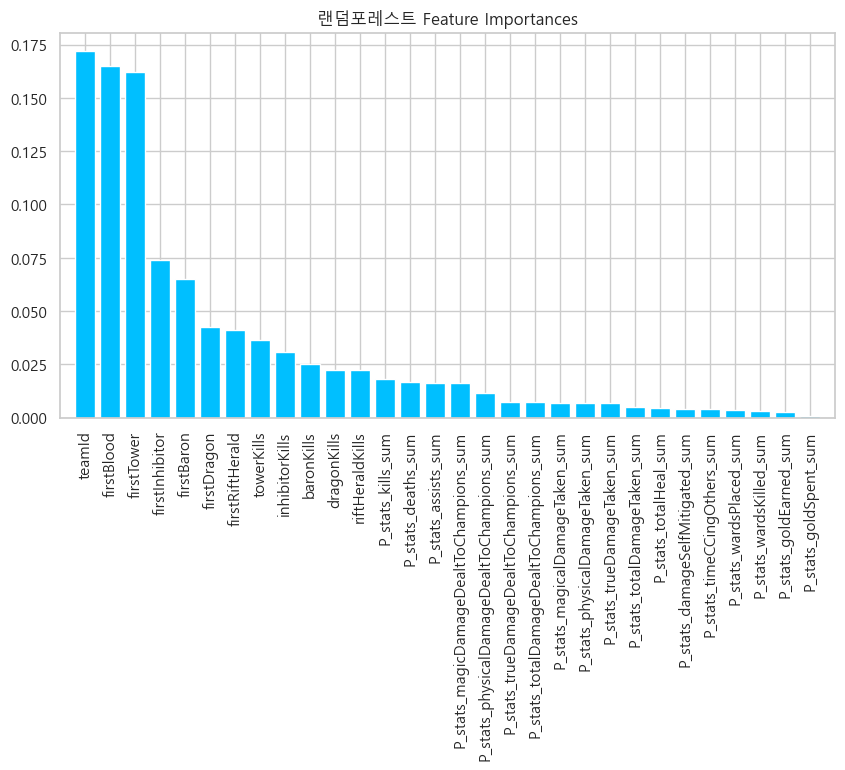

In [242]:
# 랜덤포레스트 변수 중요도
plt.figure(figsize=(10,5))

features_label = X.columns
rf_importances = rf.feature_importances_
indices = np.argsort(rf_importances)[::-1]
for i in range(X.shape[1]):
     print('%2d)%-*s%f'%(i+1, 30, features_label[i], rf_importances[indices[i]]))
plt.title('랜덤포레스트 Feature Importances')
plt.bar(range(X.shape[1]), rf_importances[indices], color='deepskyblue', align='center')
plt.xticks(range(X.shape[1]), features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Gradient Boosting Feature importances')

<AxesSubplot: title={'center': 'Gradient Boosting Feature importances'}>

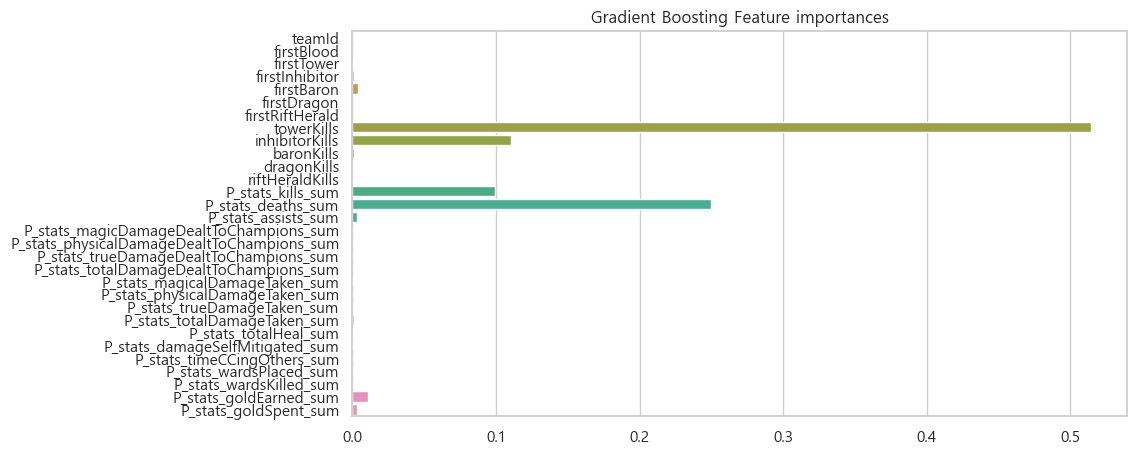

In [243]:
# Gradient Boosting 변수 중요도
plt.figure(figsize=(10,5))

gb_importances = clf_gbc.feature_importances_
gb_importances = pd.Series(gb_importances, index = X_train.columns)

plt.title('Gradient Boosting Feature importances')
sns.barplot(x=gb_importances, y=X_train.columns)
plt.show()

<AxesSubplot: title={'center': 'xgboost Feature importances'}, xlabel='F score', ylabel='Features'>

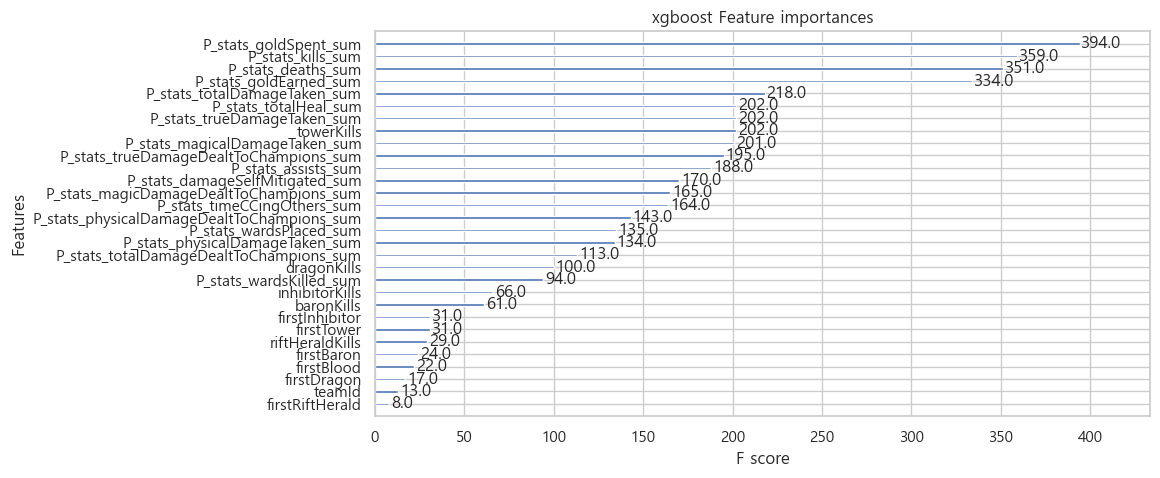

In [244]:
# xgboost 변수 중요도

fig, ax = plt.subplots(figsize=(10, 5))
plot_importance(xgb_model, title='xgboost Feature importances', ax=ax)

### 5. 로지스틱 회귀분석

In [245]:
reg_df = df.drop(['gameId', 'gameDuration', 'vilemawKills', 'dominionVictoryScore','ban_champion_1', 'ban_champion_2', 'ban_champion_3', 'ban_champion_4', 'ban_champion_5'], axis=1)
reg_df.corr()[['win']]

,win
teamId,-0.00646
win,1.00000
firstBlood,0.21999
firstTower,0.48131
firstInhibitor,0.68302
firstBaron,0.42369
firstDragon,0.29709
firstRiftHerald,0.29850
towerKills,0.76211
inhibitorKills,0.59785


In [246]:
reg_df

,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,...,P_stats_physicalDamageTaken_sum,P_stats_trueDamageTaken_sum,P_stats_totalDamageTaken_sum,P_stats_totalHeal_sum,P_stats_damageSelfMitigated_sum,P_stats_timeCCingOthers_sum,P_stats_wardsPlaced_sum,P_stats_wardsKilled_sum,P_stats_goldEarned_sum,P_stats_goldSpent_sum
0,0,1,0,1,1,0,1,1,9,1,...,53345.00000,2481.00000,83723.00000,38711.00000,43665.00000,93.00000,50.00000,17.00000,49832.00000,41935.00000
1,1,1,0,0,0,0,1,1,4,0,...,49033.00000,1358.00000,63456.00000,26397.00000,42434.00000,74.00000,57.00000,18.00000,41072.00000,34960.00000
2,0,1,1,1,1,0,1,1,5,1,...,27051.00000,638.00000,40416.00000,12589.00000,28055.00000,67.00000,40.00000,9.00000,35364.00000,30755.00000
3,0,1,1,1,0,0,0,1,6,0,...,80742.00000,10851.00000,144672.00000,65312.00000,129493.00000,163.00000,96.00000,56.00000,70528.00000,63893.00000
4,1,1,1,1,1,1,1,1,11,3,...,64462.00000,14975.00000,162481.00000,37161.00000,117374.00000,119.00000,114.00000,35.00000,74955.00000,71580.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154167,1,0,0,0,0,0,0,0,0,0,...,33286.00000,836.00000,40408.00000,6961.00000,23271.00000,31.00000,31.00000,8.00000,23269.00000,23104.00000
154168,0,0,0,1,0,0,1,0,1,0,...,57260.00000,2976.00000,96933.00000,31291.00000,58919.00000,92.00000,47.00000,19.00000,36579.00000,35740.00000
154169,0,0,0,0,0,0,0,0,0,0,...,18397.00000,1005.00000,36488.00000,5316.00000,18004.00000,42.00000,24.00000,3.00000,20917.00000,18120.00000
154170,0,0,0,1,0,0,1,1,3,0,...,52157.00000,1668.00000,80161.00000,22970.00000,58307.00000,57.00000,64.00000,22.00000,42639.00000,40008.00000


In [216]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
#from

X = reg_df[reg_df.columns.difference(['win'])]
y = reg_df['win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    win   R-squared (uncentered):                   0.848
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                          1.740e+04
Date:                Fri, 24 Feb 2023   Prob (F-statistic):                        0.00
Time:                        16:15:09   Log-Likelihood:                         -55241.
No. Observations:              115629   AIC:                                  1.106e+05
Df Residuals:                  115592   BIC:                                  1.109e+05
Df Model:                          37                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
P_stats_assists_sum                            0.0901      0.003     28.337      0.000       0.084       0.096
P_stats_damageSelfMitigated_sum               -0.0027      0.004     -0.754      0.451      -0.010       0.004
P_stats_deaths_sum                            -0.3467      0.003   -117.296      0.000      -0.353      -0.341
P_stats_goldEarned_sum                         1.5100      0.013    120.527      0.000       1.485       1.535
P_stats_goldSpent_sum                         -0.6219      0.008    -78.734      0.000      -0.637      -0.606
P_stats_kills_sum                              0.0667      0.005     14.745      0.000       0.058       0.076
P_stats_magicDamageDealtToChampions_sum       17.4290      7.041      2.475      0.013       3.629      31.229
P_stats_magicalDamageTaken_sum               -19.9460      8.280     -2.409      0.016     -36.174      -3.718
P_stats_physicalDamageDealtToChampions_sum    18.7953      7.607      2.471      0.013       3.885      33.706
P_stats_physicalDamageTaken_sum              -26.2354     10.902     -2.406      0.016     -47.604      -4.867
P_stats_timeCCingOthers_sum                    0.0022      0.002      1.295      0.195      -0.001       0.005
P_stats_totalDamageDealtToChampions_sum      -34.2880     13.898     -2.467      0.014     -61.528      -7.048
P_stats_totalDamageTaken_sum                  44.5316     18.576      2.397      0.017       8.123      80.940
P_stats_totalHeal_sum                          0.0727      0.003     27.120      0.000       0.067       0.078
P_stats_trueDamageDealtToChampions_sum         3.5841      1.449      2.473      0.013       0.744       6.424
P_stats_trueDamageTaken_sum                   -4.1415      1.715     -2.415      0.016      -7.503      -0.780
P_stats_wardsKilled_sum                       -0.0115      0.002     -4.936      0.000      -0.016      -0.007
P_stats_wardsPlaced_sum                        0.0056      0.002      2.286      0.022       0.001       0.010
ban_champion_1                                 0.0015      0.001      1.330      0.183      -0.001       0.004
ban_champion_2                                -0.0008      0.001     -0.689      0.491      -0.003       0.001
ban_champion_3                                 0.0014      0.001      1.183      0.237      -0.001       0.004
ban_champion_4                                 0.0001      0.001      0.104      0.918      -0.002       0.002
ban_champion_5                             -7.323e-05      0.001     -0.064      0.949      -0.002       0.002
baronKills                                     0.0694      0.003     24.601      0.000       0.064

Text(0.5, 1.0, 'feature_coef_graph')

Text(0.5, 0, 'X_features')

Text(0, 0.5, 'coef')

[Text(0, 0, 'P_stats_assists_sum'),
 Text(1, 0, 'P_stats_damageSelfMitigated_sum'),
 Text(2, 0, 'P_stats_deaths_sum'),
 Text(3, 0, 'P_stats_goldEarned_sum'),
 Text(4, 0, 'P_stats_goldSpent_sum'),
 Text(5, 0, 'P_stats_kills_sum'),
 Text(6, 0, 'P_stats_magicDamageDealtToChampions_sum'),
 Text(7, 0, 'P_stats_magicalDamageTaken_sum'),
 Text(8, 0, 'P_stats_physicalDamageDealtToChampions_sum'),
 Text(9, 0, 'P_stats_physicalDamageTaken_sum'),
 Text(10, 0, 'P_stats_timeCCingOthers_sum'),
 Text(11, 0, 'P_stats_totalDamageDealtToChampions_sum'),
 Text(12, 0, 'P_stats_totalDamageTaken_sum'),
 Text(13, 0, 'P_stats_totalHeal_sum'),
 Text(14, 0, 'P_stats_trueDamageDealtToChampions_sum'),
 Text(15, 0, 'P_stats_trueDamageTaken_sum'),
 Text(16, 0, 'P_stats_wardsKilled_sum'),
 Text(17, 0, 'P_stats_wardsPlaced_sum'),
 Text(18, 0, 'ban_champion_1'),
 Text(19, 0, 'ban_champion_2'),
 Text(20, 0, 'ban_champion_3'),
 Text(21, 0, 'ban_champion_4'),
 Text(22, 0, 'ban_champion_5'),
 Text(23, 0, 'baronKills'),
 T

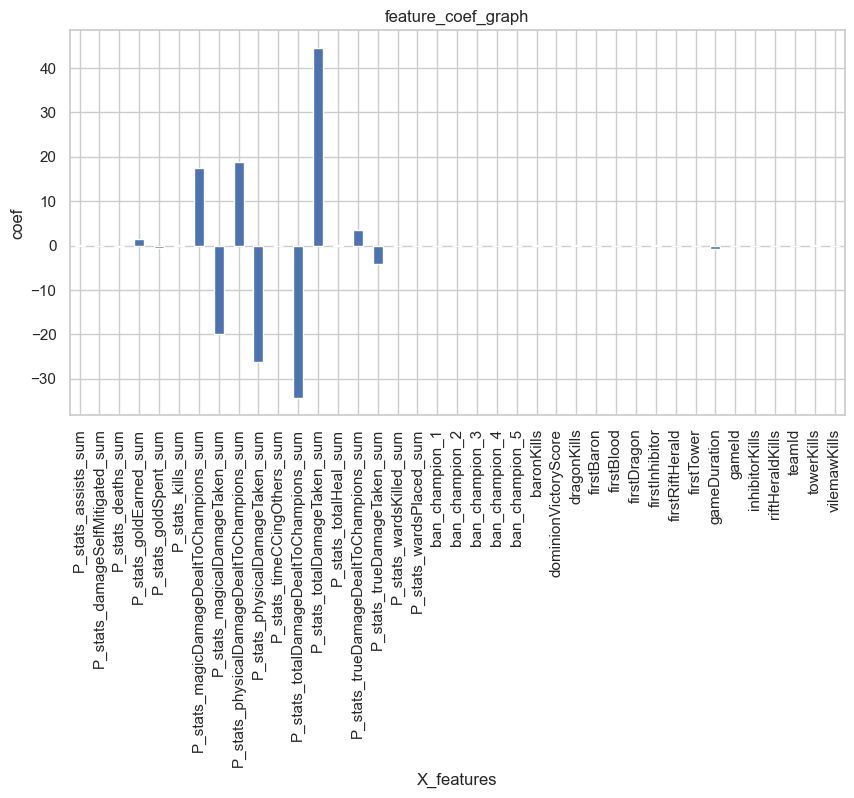

In [218]:
import matplotlib.pyplot as plt

coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

plt.rcParams['figure.figsize'] = [10,5]

x_labels = model.params.index.tolist()

ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('X_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

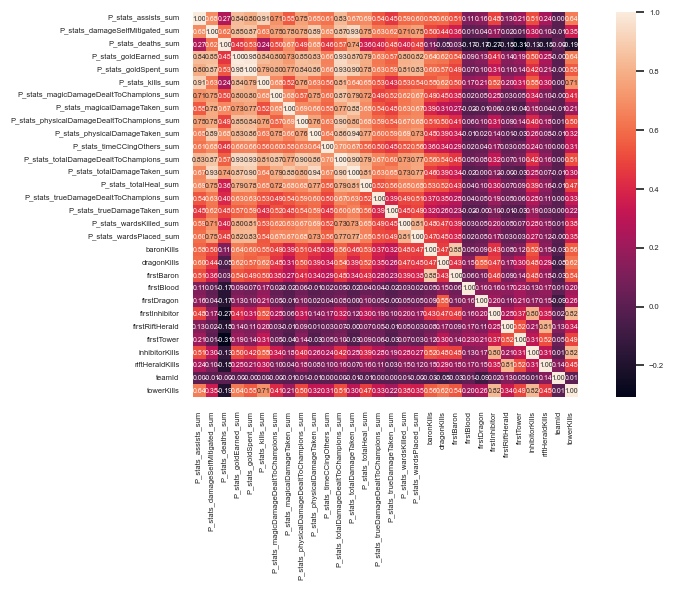

In [212]:
import seaborn as sns

corr = reg_df[X.columns].corr(method='pearson')
sns.set(font_scale=0.5)
hm = sns.heatmap(corr.values, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws ={'size' : 5}, 
                 yticklabels = X.columns, xticklabels = X.columns )

sns.set(style = 'whitegrid', context = 'notebook')
plt.show()

In [213]:
pd.options.display.float_format = '{:.5f}'.format

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round()


,VIF Factor,features
0,30.00000,P_stats_assists_sum
1,38.00000,P_stats_damageSelfMitigated_sum
2,35.00000,P_stats_deaths_sum
3,672.00000,P_stats_goldEarned_sum
4,422.00000,P_stats_goldSpent_sum
5,52.00000,P_stats_kills_sum
6,149027928.00000,P_stats_magicDamageDealtToChampions_sum
7,9738673.00000,P_stats_magicalDamageTaken_sum
8,221345116.00000,P_stats_physicalDamageDealtToChampions_sum
9,29187574.00000,P_stats_physicalDamageTaken_sum


In [178]:
# vif factor가 높은 변수를 제거하고 회귀분석 수행

X2 = reg_df[reg_df.columns.difference(['win', 'P_stats_physicalDamageTaken_sum', 'P_stats_totalDamageDealtToChampions_sum','P_stats_trueDamageDealtToChampions_sum','P_stats_trueDamageTaken_sum','P_stats_goldEarned_sum','P_stats_goldSpent_sum','P_stats_totalDamageTaken_sum', 'P_stats_kills_sum','P_stats_assists_sum','P_stats_physicalDamageDealtToChampions_sum','P_stats_wardsPlaced_sum','towerKills','P_stats_damageSelfMitigated_sum','P_stats_magicalDamageTaken_sum','P_stats_magicDamageDealtToChampions_sum'])]
y2 = reg_df['win']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=19)
model = sm.OLS(y_train2, X_train2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    win   R-squared (uncentered):                   0.821
Model:                            OLS   Adj. R-squared (uncentered):              0.821
Method:                 Least Squares   F-statistic:                          3.528e+04
Date:                Fri, 24 Feb 2023   Prob (F-statistic):                        0.00
Time:                        16:03:38   Log-Likelihood:                         -24541.
No. Observations:              115629   AIC:                                  4.911e+04
Df Residuals:                  115614   BIC:                                  4.926e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
P_stats_deaths_sum             -0.8302      0.007   -119.818      0.000      -0.844      -0.817
P_stats_timeCCingOthers_sum     0.6869      0.015     46.256      0.000       0.658       0.716
P_stats_totalHeal_sum           0.6188      0.016     38.634      0.000       0.587       0.650
P_stats_wardsKilled_sum        -0.1687      0.011    -15.001      0.000      -0.191      -0.147
baronKills                      0.2068      0.018     11.580      0.000       0.172       0.242
dragonKills                     0.5809      0.008     70.760      0.000       0.565       0.597
firstBaron                      0.0775      0.004     18.353      0.000       0.069       0.086
firstBlood                      0.0906      0.002     50.882      0.000       0.087       0.094
firstDragon                     0.0693      0.002     31.583      0.000       0.065       0.074
firstInhibitor                  0.3638      0.003    110.506      0.000       0.357       0.370
firstRiftHerald                 0.0612      0.003     19.727      0.000       0.055       0.067
firstTower                      0.1925      0.002     86.765      0.000       0.188       0.197
inhibitorKills                  0.1745      0.018      9.484      0.000       0.138       0.211
riftHeraldKills                -0.0197      0.004     -4.505      0.000      -0.028      -0.011
teamId                          0.0803      0.002     46.329      0.000       0.077       0.084
==============================================================================
Omnibus:                     2881.538   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6583.183
Skew:                          -0.092   Prob(JB):                         0.00
Kurtosis:                       4.154   Cond. No.                         35.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['features'] = X2.columns
vif.round()

,VIF Factor,features
0,7.00000,P_stats_deaths_sum
1,8.00000,P_stats_timeCCingOthers_sum
2,9.00000,P_stats_totalHeal_sum
3,8.00000,P_stats_wardsKilled_sum
4,7.00000,baronKills
5,7.00000,dragonKills
6,6.00000,firstBaron
7,2.00000,firstBlood
8,3.00000,firstDragon
9,5.00000,firstInhibitor


In [180]:
for i in range(len(model.params)):
    print('다른 변수가 고정되어 있으며, {} 이 한단위 상승할 때 승리할 확률이 {} 배 증가한다.\n'.format(model.params.keys()[i],np.exp(model.params.values[i])))

다른 변수가 고정되어 있으며, P_stats_deaths_sum 이 한단위 상승할 때 승리할 확률이 0.43598073049768193 배 증가한다.

다른 변수가 고정되어 있으며, P_stats_timeCCingOthers_sum 이 한단위 상승할 때 승리할 확률이 1.9876331707196613 배 증가한다.

다른 변수가 고정되어 있으며, P_stats_totalHeal_sum 이 한단위 상승할 때 승리할 확률이 1.856775803371753 배 증가한다.

다른 변수가 고정되어 있으며, P_stats_wardsKilled_sum 이 한단위 상승할 때 승리할 확률이 0.844733968358473 배 증가한다.

다른 변수가 고정되어 있으며, baronKills 이 한단위 상승할 때 승리할 확률이 1.229693509145009 배 증가한다.

다른 변수가 고정되어 있으며, dragonKills 이 한단위 상승할 때 승리할 확률이 1.7876433982642184 배 증가한다.

다른 변수가 고정되어 있으며, firstBaron 이 한단위 상승할 때 승리할 확률이 1.0805298310808442 배 증가한다.

다른 변수가 고정되어 있으며, firstBlood 이 한단위 상승할 때 승리할 확률이 1.0947772511446907 배 증가한다.

다른 변수가 고정되어 있으며, firstDragon 이 한단위 상승할 때 승리할 확률이 1.0717705800447301 배 증가한다.

다른 변수가 고정되어 있으며, firstInhibitor 이 한단위 상승할 때 승리할 확률이 1.4388333591322153 배 증가한다.

다른 변수가 고정되어 있으며, firstRiftHerald 이 한단위 상승할 때 승리할 확률이 1.063071298210004 배 증가한다.

다른 변수가 고정되어 있으며, firstTower 이 한단위 상승할 때 승리할 확률이 1.2122604651310724 배 증가한다.

다른 변수가 고정되어 있으며, inhibitorKills